# The Training process for EigenFace

In [2]:
import os
import numpy as np
import cv2 as cv
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [5]:
faces = []
filepath = './train'
count = 0
for pics_dir, label in zip(data.img_train, data.label_train):
    if count == label:
        path = os.path.join(filepath, pics_dir)
        face = cv.imread(path, 0)
        if face is not None:
            face = cv.equalizeHist(face)
            face_vec = np.reshape(face, -1)
            faces.append(face_vec)
        count += 1
faces = np.array(faces, dtype=np.float32)
faces = faces.T

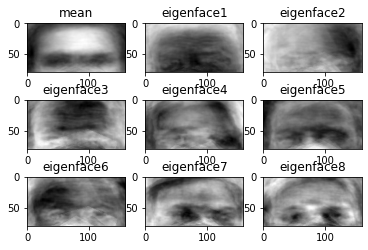

In [7]:
pca = PCA()
pca.fit(np.transpose(faces))
W = pca.components_
m = pca.mean_

plt.subplot(3,3,1)
plt.imshow(m.reshape(80,160),cmap = 'gray')
plt.title('mean')
for i in range(3,11):
    plt.subplot(3,3,i-1)
    plt.imshow(W[i-3].reshape(80,160),cmap = 'gray') 
    t = i - 2
    plt.title(f'eigenface{t}')
plt.show()

In [2]:
model  = cv.face.EigenFaceRecognizer_create()

In [3]:
faces = []
filepath = './train'
for pics_dir in os.listdir(filepath):
    path = os.path.join(filepath, pics_dir)
    face = cv.imread(path, 0)
    face = cv.equalizeHist(face)
    faces.append(face)

In [4]:
import pandas as pd
data = pd.read_csv('train.csv')

In [5]:
model.train(np.asarray(faces), np.asarray(data.label_train))

In [6]:
testdata = pd.read_csv('test.csv')
test_faces, test_labels = [], []
filepath = 'data/test'
for pics_dir in os.listdir(filepath):
    path = os.path.join(filepath, pics_dir)
    face = cv.imread(path, 0)
    face = cv.equalizeHist(face)
    test_faces.append(face)

In [7]:
predicts= []
for face in test_faces:
    params = model.predict(face)
    predicts.append(params[0])

In [8]:
result = testdata.label_train.tolist()

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(result, predicts)

0.25

# Try to increase the brightness and Contract Ratio of image

In [12]:
facesHSV, faces = [], []
filepath = 'data/train'
for pics_dir in os.listdir(filepath):
    path = os.path.join(filepath, pics_dir)
    face =  cv.imread(path)
    faces.append(face)
    facesHSV.append(face)

In [13]:
bright = []
for face in faces:
    testface = cv.cvtColor(face, cv.COLOR_BGR2HSV)
    bright.append(np.mean(testface[:,:,2]))

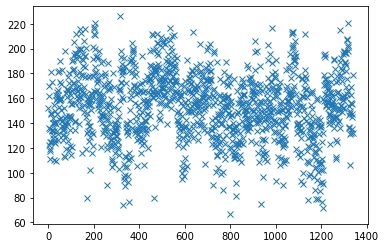

In [14]:
x = [i for i in range(len(bright))]
plt.plot(x, bright,'x')

In [15]:
import pandas as pd
data = pd.read_csv('train.csv')
for i in range(len(bright)):
    if bright[i] <= 100:
        #testface = cv.cvtColor(faces[i], cv.COLOR_HSV2BGR)
        print(data.img_train[i])

Serena_Williams_0032.jpg
Juan_Carlos_Ferrero_0007.jpg
Alejandro_Toledo_0002.jpg
Pete_Sampras_0014.jpg
Pete_Sampras_0018.jpg
Pete_Sampras_0009.jpg
Pete_Sampras_0002.jpg
Hans_Blix_0021.jpg
Hans_Blix_0030.jpg
Hans_Blix_0024.jpg
Jiang_Zemin_0005.jpg
Carlos_Menem_0015.jpg
Carlos_Menem_0007.jpg
Carlos_Menem_0013.jpg
Gloria_Macapagal_Arroyo_0005.jpg
Ariel_Sharon_0034.jpg
Ariel_Sharon_0016.jpg
Ariel_Sharon_0012.jpg
Guillermo_Coria_0005.jpg
Guillermo_Coria_0008.jpg
Jean_Chretien_0030.jpg
Jean_Chretien_0055.jpg
Saddam_Hussein_0001.jpg
Roh_Moo-hyun_0017.jpg
Tom_Daschle_0024.jpg
Tom_Daschle_0023.jpg
Jose_Maria_Aznar_0007.jpg
Hugo_Chavez_0069.jpg
Hugo_Chavez_0024.jpg
Hugo_Chavez_0049.jpg
Hugo_Chavez_0051.jpg
Hugo_Chavez_0022.jpg
Hugo_Chavez_0028.jpg
Hugo_Chavez_0014.jpg
Hugo_Chavez_0042.jpg
Andre_Agassi_0012.jpg
Andre_Agassi_0028.jpg
Andre_Agassi_0021.jpg
Andre_Agassi_0017.jpg
Andre_Agassi_0007.jpg
Andre_Agassi_0020.jpg
